# Analyzing Telia data


In [1]:
import pandas as pd
from kernel_fca_oo import ConfLexiSeriateSystem, LexiSystem
import timeit
import matplotlib.pyplot as plt

In [2]:
KATALOOG = "..\\"
data = pd.read_csv(KATALOOG+"priv2.csv", sep=',', index_col=0, encoding='latin1')


In [3]:
data.describe()

,client 1,client 2,client 3,client 4,client 5,client 6,client 7,client 8,client 9,client 10,...,client 538,client 539,client 540,client 541,client 542,client 543,client 544,client 545,client 546,client 547
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.041096,0.123288,0.219178,0.150685,0.164384,0.301370,0.095890,0.136986,0.164384,0.205479,...,0.205479,0.123288,0.219178,0.150685,0.136986,0.178082,0.219178,0.164384,0.082192,0.054795
std,0.199886,0.331042,0.416552,0.360217,0.373188,0.462028,0.296479,0.346212,0.373188,0.406848,...,0.406848,0.331042,0.416552,0.360217,0.346212,0.385230,0.416552,0.373188,0.276557,0.229154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Use Conformism Lexicographic system that is a small improvement over Frequency Lexicographic system described in my article.

In [4]:
system = LexiSystem(data, refill=True)


Time the execution, then execute actually.

In [5]:
%%timeit -n1
_, _ =  system.conceptchaincover(max_cc=100)

2.31 s ± 69.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
cc, uc =  system.conceptchaincover(max_cc=100)

Plot the nr of concept chains vs data table yet uncovered graph.

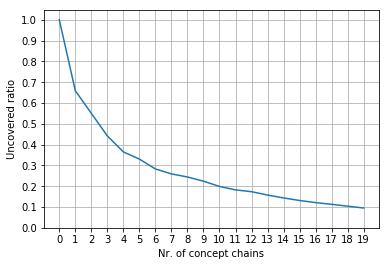

In [7]:
cc_nrs = range(len(uc)+1)
plt.plot(cc_nrs, [1.0] + uc)
plt.xlabel("Nr. of concept chains")
plt.xticks(cc_nrs)
plt.ylabel("Uncovered ratio")
plt.yticks([x/10 for x in range(0, 11)])
plt.grid()
plt.show()

Print the concept chains in the order of importance. Chain is printed as a sequence of attribute names, followed by the number of objects having all the attributes upwards in the chain and a bar visualizing this number. After the chain is the ratio of data table (1s) yet to cover.

In [8]:
def conceptchain_tri_str(cc, maxlinelen=60):
    max_i = len(cc[0][1])
    #print(cc.local_maxima()) # Kuidas lisada?
    index = 0
    for (full_e, i), e in zip(cc, cc.extent_labels()):
        for kood in e:
            aine_str = str(kood) + '_' + '_'*(round(maxlinelen*(len(i)/max_i))-len(kood)) + str(len(i))
            print(aine_str)
        index += 1

        
def conceptchain_lat_str(cc):
    s_list = []
    for (full_e, i), e in zip(cc, cc.extent_labels()):
        s_e = "{" + ", ".join(str(x) for x in e) + "}"
        s_list.append(r"$\langle " + str(len(i)) + ", " + s_e + r" \rangle$")
    #print(s_list)
    result = ",\n".join(s_list) 
    return result
                             
        
for c, u in zip(cc, uc):
    #print(conceptchain_str(c))
    #print(conceptchain_tri_str(c, maxlinelen=40))
    print(conceptchain_lat_str(c))
    print("Uncovered ratio: ", u)
    print("\n----------------------------------\n")

$\langle 411, {service 11} \rangle$,
$\langle 316, {service 56} \rangle$,
$\langle 315, {service 18} \rangle$,
$\langle 297, {service 64} \rangle$,
$\langle 158, {service 44} \rangle$,
$\langle 157, {service 43} \rangle$,
$\langle 146, {service 65} \rangle$,
$\langle 114, {service 61} \rangle$,
$\langle 108, {service 13} \rangle$,
$\langle 43, {service 58} \rangle$,
$\langle 35, {service 10} \rangle$,
$\langle 31, {service 35} \rangle$,
$\langle 11, {service 51} \rangle$,
$\langle 8, {service 50} \rangle$,
$\langle 5, {service 23} \rangle$,
$\langle 3, {service 9} \rangle$,
$\langle 2, {service 41, service 36, service 63} \rangle$,
$\langle 1, {service 66, service 22, service 21} \rangle$
Uncovered ratio:  0.6589549889833176

----------------------------------

$\langle 337, {service 35} \rangle$,
$\langle 286, {service 61} \rangle$,
$\langle 95, {service 9} \rangle$,
$\langle 53, {service 44} \rangle$,
$\langle 52, {service 43} \rangle$,
$\langle 33, {service 10} \rangle$,
$\langle 20